# Code-Python
Tianchen Gao

## Introduction
This code uses a citation network as an example to demonstrate network construction, basic descriptive analysis, and visualization.

In [16]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Construct Citation Network

In [5]:
# Read in the edge data (citation network)
citation = pd.read_csv("Edgelist_citation_network.csv")

# Filter by year (2000-2005)
citation = citation[(citation["Year"] <= 2005) & (citation["Year"] >= 2000)]

# Construct the citation network
g = nx.from_pandas_edgelist(citation, source="Source", target="Target", create_using=nx.DiGraph)

# View the network
g

## Descriptive Analysis
### Basic

In [6]:
# Number of nodes and edges in the network
num_nodes = g.number_of_nodes()
num_edges = g.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Network density
density = nx.density(g)
print("Network density:", density)

# Node degree
degrees = dict(g.degree())
# Minimum and maximum degree values
min_degree = min(degrees.values())
max_degree = max(degrees.values())
print("Minimum degree:", min_degree)
print("Maximum degree:", max_degree)

Number of nodes: 23395
Number of edges: 63545
Network density: 0.0001161057822799061
Minimum degree: 1
Maximum degree: 259


### Degree Distribution 

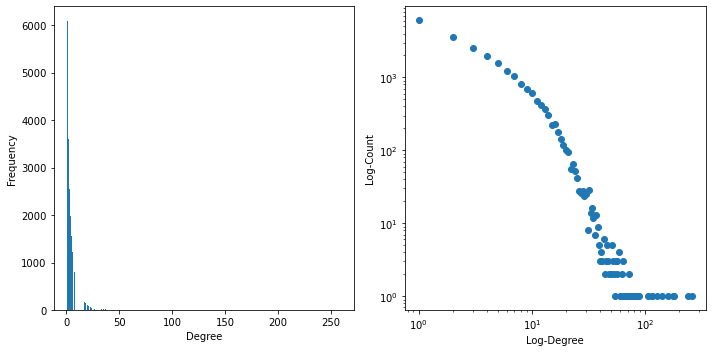

In [8]:
# Set up the canvas
plt.figure(figsize=(10, 5))

# Plot degree distribution histogram
plt.subplot(1, 2, 1)
plt.hist(list(dict(g.degree()).values()), bins='auto')
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Plot double-log degree distribution graph
plt.subplot(1, 2, 2)
degrees = list(dict(g.degree()).values())
degree_counts = {degree: degrees.count(degree) for degree in degrees}
x = [degree for degree, count in degree_counts.items()]
y = [count for degree, count in degree_counts.items()]
plt.loglog(x, y, 'o')
plt.xlabel("Log-Degree")
plt.ylabel("Log-Count")
plt.tight_layout()
plt.show()

### Centrality

In [15]:
# Degree centrality
degree_cent = nx.degree_centrality(g)
print("Degree centrality:")
print(dict(list(degree_cent.items())[:5]))  # Print the top 5 nodes

# Closeness centrality
closeness_cent = nx.closeness_centrality(g)
print("Closeness centrality:")
print(dict(list(closeness_cent.items())[:5]))  # Print the top 5 nodes

# Betweenness centrality
betweenness_cent = nx.betweenness_centrality(g)
print("Betweenness centrality:")
print(dict(list(betweenness_cent.items())[:5]))  # Print the top 5 nodes

Degree centrality:
{'Paper_2': 8.54920064973925e-05, 'Paper_21959': 4.274600324869625e-05, 'Paper_21798': 4.274600324869625e-05, 'Paper_3': 0.00021373001624348125, 'Paper_378': 0.000170984012994785}
Closeness centrality:
{'Paper_2': 0.0, 'Paper_21959': 4.274600324869625e-05, 'Paper_21798': 4.274600324869625e-05, 'Paper_3': 0.0, 'Paper_378': 0.0001781083468695677}
Betweenness centrality:
{'Paper_2': 0.0, 'Paper_21959': 0.0, 'Paper_21798': 0.0, 'Paper_3': 0.0, 'Paper_378': 0.0}


### Neighbors

In [18]:
neighbors = list(g.neighbors('Paper_4'))
print(neighbors)

['Paper_2155', 'Paper_2565', 'Paper_4765', 'Paper_2939', 'Paper_23962', 'Paper_1181', 'Paper_4029', 'Paper_2417', 'Paper_9044', 'Paper_23040', 'Paper_4401']


### Ego Network

In [19]:
# Extract node neighborhoods
gn = [nx.ego_graph(g, n, radius=1) for n in g.nodes()]

# Display the number of nodes in the subgraph of the first 20 node neighborhoods
node_counts = [len(subgraph.nodes()) for subgraph in gn[:20]]
print(node_counts)

[3, 1, 1, 6, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Visualization

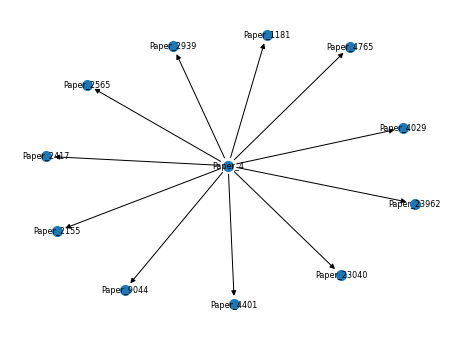

In [25]:
# Extract node neighborhoods
gn = nx.ego_graph(g, "Paper_4", radius=1)

# Plotting the 1st order neighborhood subgraph of node "Paper_4"
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(gn, k=0.15, iterations=50)  # Fruchterman-Reingold layout
nx.draw_networkx_nodes(gn, pos, node_size=100)
nx.draw_networkx_labels(gn, pos, font_size=8)
nx.draw_networkx_edges(gn, pos)
plt.axis('off')
plt.show()